In [214]:
import numpy as np
import scipy as cp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import sem 
from scipy.stats import tstd

In [215]:
## Indicaciones
#Hola querido lector, en esta tarea encontraras una sección de variables, de funciones y luego las graficas pedidas.
#Las funciones estan divididas en las funciones lambda(variables función) y  las funciones mas grandes que calculan los valores de los datos y grafican

In [216]:
## Apartado de variables

In [217]:
rango = np.genfromtxt('datos-carro-1d.csv',skip_header=5,delimiter=',',missing_values=np.nan)#skip_header = empieza a contar desde la columna 5, missing_values = cambia el tipo de variable
init = 30
dt = rango[init:81,:]#define un rango que inicia en 25 hasta 81 eliminando los valores nulos y tomando solo el intervalo de movimiento
step = 18/np.size(dt[:,0])#el step se toma para dividir h en partes iguales 
#Se definen las variables apartir del rango para facilitar la escritura
t = dt[:,0]
h = np.power(10.0, np.arange(-18, 0, +step))
x = dt[:,1]
y = dt[:,2]
vx = dt[:,3]
vy = dt[:,4]
ax = dt[:,5]
ay = dt[:,6]
ac = root(ax,ay)
d = root(x,y)
v = root(vx,vy)
#dm[i] = dm[i]+dm[i-1]
ads = [1,2,3,4,5]
ads = np.cumsum(ads)
ads

array([ 1,  3,  6, 10, 15])

In [218]:
## Apartado de funciones

In [219]:
#Funciones lambda, para los calculos de una linea simplemente se referencia la variable como funcion(variables)
central = lambda f,x,h:(f(x+h/2)-f(x-h/2))/h #Calcula la derivada central
linear = lambda t,a,vo,c:vo + a*t#a*np.power(t,2) +b*t + c#La función del ajuste de la distancia
root = lambda termA,termB:np.sqrt(np.power(termA,2)+np.power(termB,2))#Calcula la magnitud de un vector
funAjuste = lambda t,x,vo,xo:(2*(x-(xo + vo*t)))/(np.power(t,2))#Calcula la función utilizando la ecuación de movimiento cuadratica
#Funciones mas grandes de calculo de valores y graficación 
def aumentar(arr,add):
    ''' 
    Estam función toma un array, le añade el valor append al principio del array
    '''
    copy = np.copy(arr)
    copy = np.append(add,copy)
    return copy 
def calculate_speed(position, time):
    delta_position = np.diff(position)
    delta_time = np.diff(time)
    speed = delta_position / delta_time
    return speed
def calculate_acceleration(position, speed, time):
    delta_position = np.diff(position)
    delta_time = np.diff(time)
    acceleration = ((delta_position - speed[:-1]*delta_time) * 2) / (np.power(delta_time, 2))
    return acceleration
def distance(t,d):
    '''La función distancia calcula la velocidad punto a punto y devuelve un array de numpy con los datos de la misma'''
    dm = np.copy(d)
    dm = anterior(dm,root(rango[init-1,1],rango[init-1,2]))
    deltaX = d + dm
    Vcalculada = deltaX/t 
    return Vcalculada
def graficar(t,datos1,datos2,datos3,texto,labels,popt):
    '''La función graficar recibe 3 grupos de datos, una lista de textos y una lista de labels que utilizara para agregar el texto de la función '''
    s = 5
    ax = plt.subplot()
    ax.set_xlim(1,2.7)
    ax.set_ylim(0,1)
    ax.set_xlabel(texto[0])
    ax.set_ylabel(texto[1])
    ax.set_title(texto[2])
    ax.plot(t,datos1,'bo-',markersize=s,markerfacecolor='black',label = labels[0])
    ax.plot(t,datos2,'gs-',markersize=8,markerfacecolor='yellow', label= (labels[1] ))
    if(type(datos3) == type(datos2)):
        ax.plot(t,datos3,'rp',markersize=s,markerfacecolor='red',label = labels[2])
    ax.legend()
    ax.grid()
    return ax
def calcVel(t):
    copy = aumentar(d,root(rango[init-1,1],rango[init-1,2]))
    copy2 = aumentar(t,rango[init-1,0])
    #copy = np.copy(d)
    #copy = np.append(root(rango[init-1,1],rango[init-1,2]),copy)
    #copy2 = np.copy(t)
    #copy2 = np.append(rango[init-1,0],copy2)
    velocidad = calculate_speed(copy,copy2)
    popt, pcov = curve_fit(linear, t, velocidad)
    texto = ['x(t)','t','velocidad en función del tiempo']
    a,b,c = popt
    labels = ['derivada punto a punto',f'teroica, errores: a={round(a,3)}, b={round(b,3)}',"experimental" ]
    #Grafica
    ax = graficar(t,velocidad,linear(t,*popt),v,texto,labels,popt)
    return a,b,c,ax
def calcAcel(val):
    '''calcula las velocidad exigidas en el punto 2 '''
    spee = aumentar(v,root(rango[init-1,3],rango[init-1,4]))
    pos = aumentar(d,root(rango[init-1,1],rango[init-1,2]))
    tim = aumentar(t,rango[init-1,0])
    xposi = calculate_acceleration(pos,spee,tim)
    media = np.mean(ac)
    desviacion = np.std(ac)
    a = val[0]
    acel =  np.full( np.size(t), a, dtype='float')
    popt, pcov = curve_fit(funAjuste, t,xposi)
    ar,vo,c = popt
    texto =['t','v(t)','t vs velocidad']
    labels = ['valor numerico ', f'teorica, errores: a={round(ar,3)}, b={round(vo,3)}',f'experimental, promedio = {round(media,3)},desviación={round(desviacion,3)}']
    ax = graficar(t,acel,funAjuste(t,*popt),ac,texto,labels,popt)
    #ax = graficar(t,acel,xposi,ac,texto,labels,popt)
    return vo,ar,ax

In [220]:
## Apartado de variables 

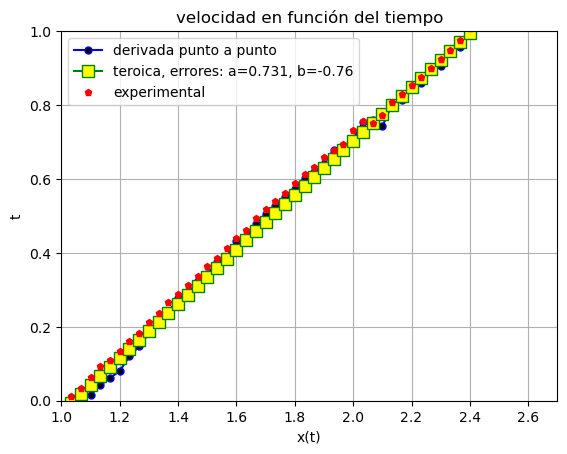

In [221]:
values = calcVel(t)#almacena la grafica y los valores de los coeficientes 
val = values[0:3]#almacena los coeficientes: a,b,c 
plt.show()

In [222]:
## Velocidades 

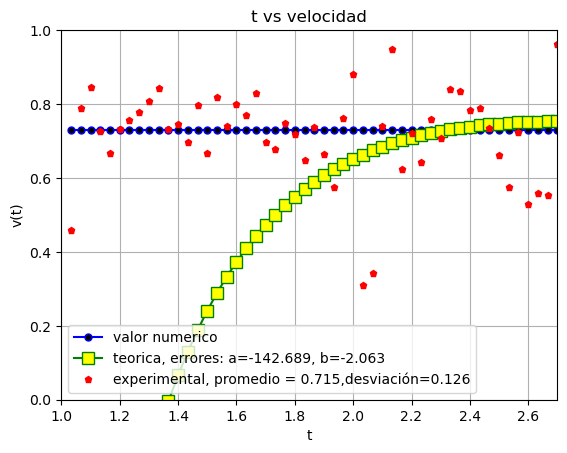

In [223]:
items = calcAcel(values)
items[2]
plt.show()